# Import data from TXT files

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import xgboost as xgb
import os

In [6]:
import time
start_time = time.process_time()

import pandas as pd
df_ps1 = pd.read_csv("data/PS1.txt", header=None, sep='\t')
df_ps2 = pd.read_csv("data/PS2.txt", header=None, sep='\t')
df_ps3 = pd.read_csv("data/PS3.txt", header=None, sep='\t')
df_ps4 = pd.read_csv("data/PS4.txt", header=None, sep='\t')
df_ps5 = pd.read_csv("data/PS5.txt", header=None, sep='\t')
df_ps6 = pd.read_csv("data/PS6.txt", header=None, sep='\t')
df_eps1 = pd.read_csv("data/EPS1.txt", header=None, sep='\t')
df_fs1 = pd.read_csv("data/FS1.txt", header=None, sep='\t')
df_fs2 = pd.read_csv("data/FS2.txt", header=None, sep='\t')
df_ts1 = pd.read_csv("data/TS1.txt", header=None, sep='\t')
df_ts2 = pd.read_csv("data/TS2.txt", header=None, sep='\t')
df_ts3 = pd.read_csv("data/TS3.txt", header=None, sep='\t')
df_ts4 = pd.read_csv("data/TS4.txt", header=None, sep='\t')
df_vs1 = pd.read_csv("data/VS1.txt", header=None, sep='\t')
df_ce = pd.read_csv("data/CE.txt", header=None, sep='\t')
df_cp = pd.read_csv("data/CP.txt", header=None, sep='\t')
df_se = pd.read_csv("data/SE.txt", header=None, sep='\t')
df_profile = pd.read_csv("data/profile.txt", header=None, sep='\t')

end_time = time.process_time()
print(end_time - start_time, "seconds")

18.4375 seconds


In [7]:
data_list = [
    df_ps1, df_ps2, df_ps3, df_ps4, df_ps5, df_ps6, df_eps1, df_fs1, df_fs2,
    df_ts1, df_ts2, df_ts3, df_ts4, df_vs1, df_ce, df_cp, df_se, df_profile
]

for x in data_list:
    print(x.shape)

(2205, 6000)
(2205, 6000)
(2205, 6000)
(2205, 6000)
(2205, 6000)
(2205, 6000)
(2205, 6000)
(2205, 600)
(2205, 600)
(2205, 60)
(2205, 60)
(2205, 60)
(2205, 60)
(2205, 60)
(2205, 60)
(2205, 60)
(2205, 60)
(2205, 5)


### Sensor File Descriptions
Attribute Information:
The data set contains raw process sensor data (i.e. without feature extraction) which 
are structured as matrices (tab-delimited) with the rows representing the cycles and 
the columns the data points within a cycle. The sensors involved are:

|Sensor		|Physical quantity				|Unit	|Sampling rate|
|-----------|-------------------------------|-------|-------------|
|PS1		|Pressure						|bar	|       100 Hz|
|PS2		|Pressure						|bar	|       100 Hz|
|PS3		|Pressure						|bar	|		100 Hz|
|PS4		|Pressure						|bar	|		100 Hz|
|PS5		|Pressure						|bar	|		100 Hz|
|PS6		|Pressure						|bar	|		100 Hz|
|EPS1		|Motor power				    |W		|		100 Hz|
|FS1		|Volume flow					|l/min	|		 10 Hz|
|FS2		|Volume flow					|l/min	|		 10 Hz|
|TS1		|Temperature					|&deg;C	|		  1 Hz|
|TS2		|Temperature					|&deg;C	|		  1 Hz|
|TS3		|Temperature					|&deg;C |		  1 Hz|
|TS4		|Temperature					|&deg;C |		  1 Hz|
|VS1		|Vibration						|mm/s	|		  1 Hz|
|CE			|Cooling efficiency (virtual)	|%		|		  1 Hz|
|CP			|Cooling power (virtual)		|kW		|		  1 Hz|
|SE			|Efficiency factor				|%		|		  1 Hz|

'''

The target condition values are cycle-wise annotated in â€˜profile.txtâ€˜ (tab-delimited).
As before, the row number represents the cycle number. The columns are

1: Cooler condition / %:
3: close to total failure
20: reduced effifiency
100: full efficiency

2: Valve condition / %:
100: optimal switching behavior
90: small lag
80: severe lag
73: close to total failure

3: Internal pump leakage:
0: no leakage
1: weak leakage
2: severe leakage

4: Hydraulic accumulator / bar:
130: optimal pressure
115: slightly reduced pressure
100: severely reduced pressure
90: close to total failure

5: stable flag:
0: conditions were stable
1: static conditions might not have been reached yet

'''

In [9]:
import inspect


def retrieve_name(var):
        """
        Gets the name of var. Does it from the out most frame inner-wards.
        :param var: variable to get name from.
        :return: string
        """
        for fi in reversed(inspect.stack()):
            names = [var_name for var_name, var_val in fi.frame.f_locals.items() if var_val is var]
            if len(names) > 0:
                return names[0]


# Preprocessing

## Downsampling

In [10]:
y_coolerCondition = pd.DataFrame(df_profile.iloc[:, 0])
y_valveCondition = pd.DataFrame(df_profile.iloc[:, 1])
y_pumpLeak = pd.DataFrame(df_profile.iloc[:, 2])
y_hydraulicAcc = pd.DataFrame(df_profile.iloc[:, 3])
y_stableFlag = pd.DataFrame(df_profile.iloc[:, 4])

In [11]:
#average the cycle data


def mean_conversion(df):
    df1 = pd.DataFrame()
    df1 = df.mean(axis=1)
    return df1

In [12]:
PS1 = pd.DataFrame(mean_conversion(df_ps1))
PS1.columns = ['PS1']

PS2 = pd.DataFrame(mean_conversion(df_ps2))
PS2.columns = ['PS2']

PS3 = pd.DataFrame(mean_conversion(df_ps3))
PS3.columns = ['PS3']

PS4 = pd.DataFrame(mean_conversion(df_ps4))
PS4.columns = ['PS4']

PS5 = pd.DataFrame(mean_conversion(df_ps5))
PS5.columns = ['PS5']

PS6 = pd.DataFrame(mean_conversion(df_ps6))
PS6.columns = ['PS6']

FS1 = pd.DataFrame(mean_conversion(df_fs1))
FS1.columns = ['FS1']

FS2 = pd.DataFrame(mean_conversion(df_fs2))
FS2.columns = ['FS2']

TS1 = pd.DataFrame(mean_conversion(df_ts1))
TS1.columns = ['TS1']

TS2 = pd.DataFrame(mean_conversion(df_ts2))
TS2.columns = ['TS2']

TS3 = pd.DataFrame(mean_conversion(df_ts3))
TS3.columns = ['TS3']

TS4 = pd.DataFrame(mean_conversion(df_ts4))
TS4.columns = ['TS4']

P1 = pd.DataFrame(mean_conversion(df_eps1))
P1.columns = ['P1']

VS1 = pd.DataFrame(mean_conversion(df_vs1))
VS1.columns = ['VS1']

CE1 = pd.DataFrame(mean_conversion(df_ce))
CE1.columns = ['CE1']

CP1 = pd.DataFrame(mean_conversion(df_cp))
CP1.columns = ['CP1']

SE1 = pd.DataFrame(mean_conversion(df_se))
SE1.columns = ['SE1']

In [13]:
#combine all dataframes

X = pd.concat([
    PS1, PS2, PS3, PS4, PS5, PS6, FS1, FS2, TS1, TS2, TS3, TS4, P1, VS1, CE1,
    CP1, SE1
],
              axis=1)

In [14]:
X.shape

(2205, 17)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000202DFBA6208>,
      dtype=object)

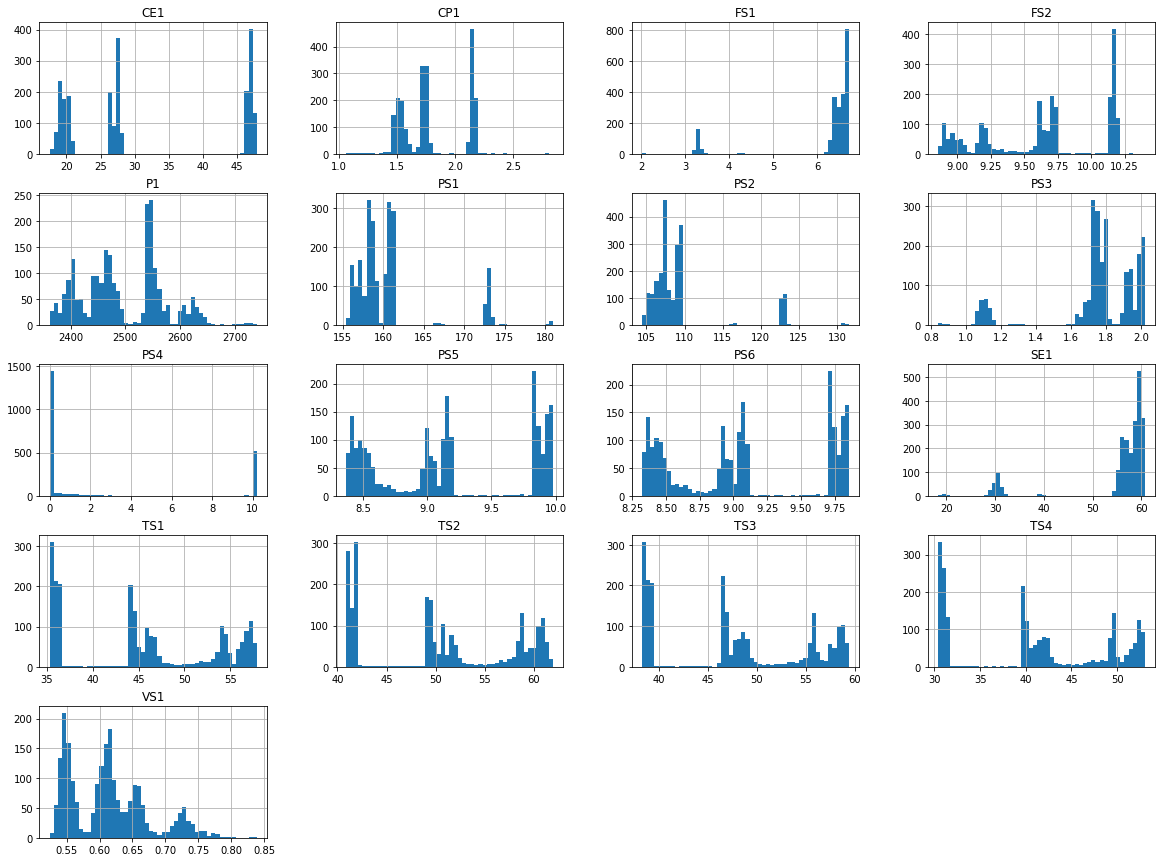

In [16]:
#Lets draw histogram of each value

X.hist(bins=50, figsize=(20, 15))

let's get a correlation matix between various sensor parameters

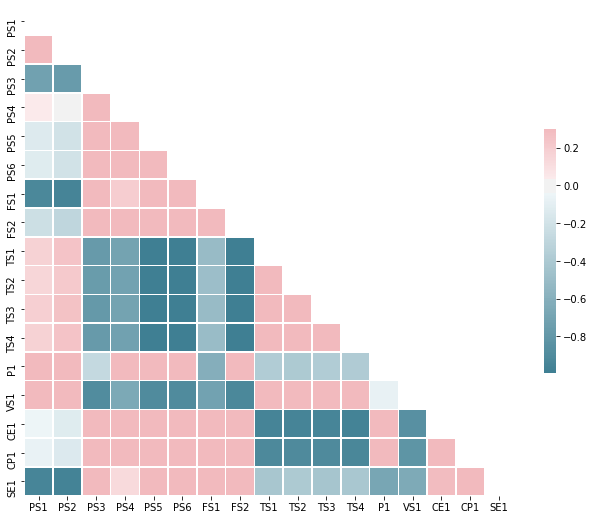

In [24]:
corr_matrix = X.corr()

#plot heat map for correlation matrix (from https://seaborn.pydata.org/examples/many_pairwise_correlations.html)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix,
            mask=mask,
            cmap=cmap,
            vmax=.3,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5})

Some of the features seems to be highly correlated. Let's normalize these parameters and do PCA

Text(0.5, 1.0, 'PCA explained variance vs. n componets')

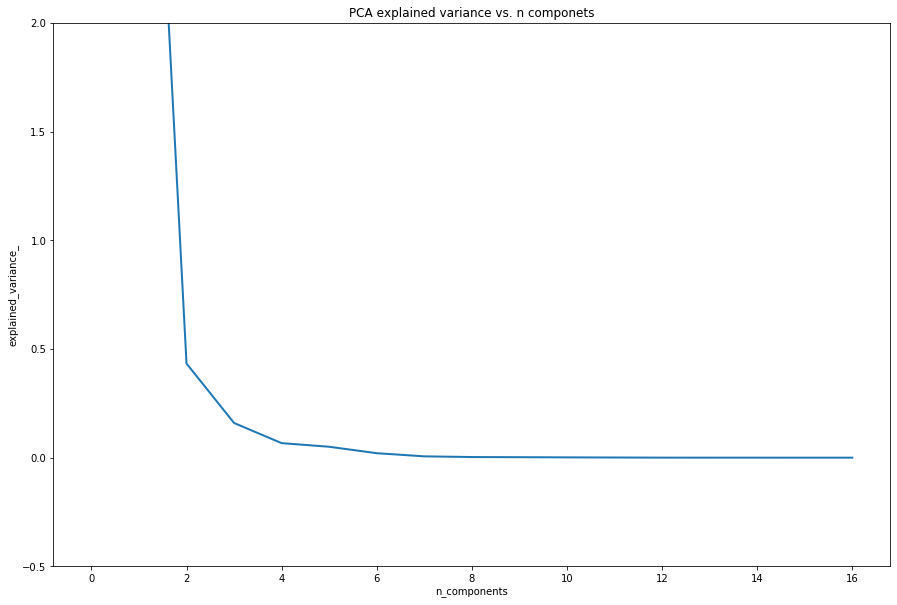

In [25]:
#normalize the X values
X_normalize = StandardScaler().fit_transform(X)

#apply PCA to visulaize the data in cluster
from sklearn.decomposition import PCA
#find explained variance and n_components

pca = PCA()
pca.fit(X_normalize)
plt.figure(figsize=(15, 10))
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.ylim(-0.5, 2)
plt.title('PCA explained variance vs. n componets')

(2205, 17)
(2205, 2)


Text(0.5, 1.0, 'Clustering of data when PCA dimension =2')

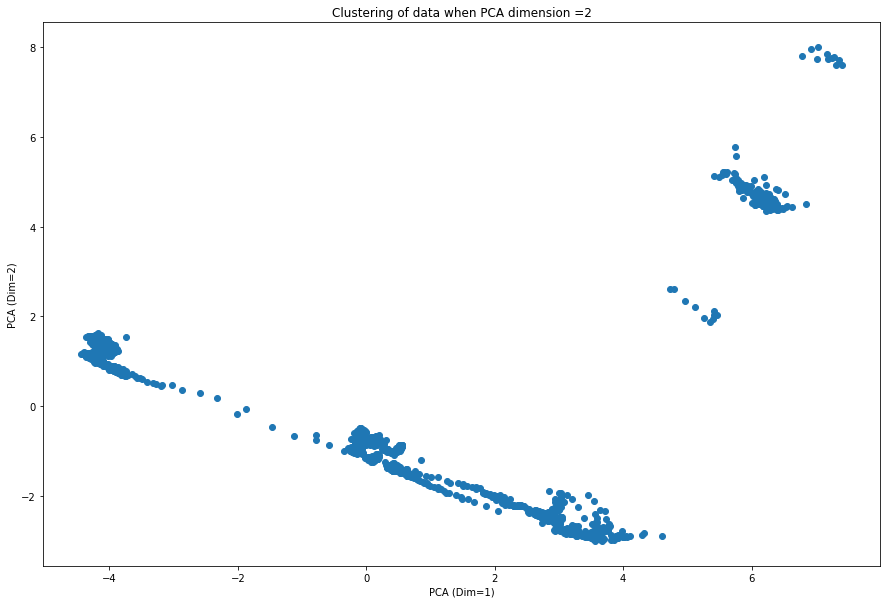

In [26]:
#observe distribution when n_componets =2
pca_2 = PCA(2)
projected = pca_2.fit_transform(X_normalize)
print(X.shape)
print(projected.shape)
plt.figure(figsize=(15, 10))
plt.scatter(projected[:, 0], projected[:, 1])
plt.xlabel('PCA (Dim=1)')
plt.ylabel('PCA (Dim=2)')
plt.title('Clustering of data when PCA dimension =2')

# Machine Learning

In [27]:
def predict_pump_performance(X, y, predictType):
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=24)

    X_test, X_val, y_test, y_val = train_test_split(X_test,
                                                    y_test,
                                                    test_size=0.5,
                                                    random_state=24)

    #we will use xgboost to do the classification
    seed = 24
    xgb1 = xgb.sklearn.XGBClassifier(learning_rate=0.1,
                                     n_estimators=100,
                                     max_depth=5,
                                     min_child_weight=11,
                                     gamma=0.1,
                                     subsample=0.8,
                                     colsample_bytree=0.7,
                                     objective='multi:softprob',
                                     n_jobs=-1,
                                     scale_pos_weight=1,
                                     seed=seed)

    xgb1.fit(X_train, y_train)

    y_pred = xgb1.predict(X_val)

    #confusion matrix and classification report

    cm = confusion_matrix(y_val, y_pred)

    print(classification_report(y_val, y_pred))

    fig, ax = plt.subplots(figsize=(15, 10))
    ind = np.arange(17)
    width = 0.15
    feature_importtance = xgb1.feature_importances_
    rect1 = ax.bar(ind + width, feature_importtance)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(
        ('PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6', 'FS1', 'FS2', 'TS1', 'TS2',
         'TS3', 'TS4', 'P1', 'VS1', 'CE1', 'CP1', 'SE1'))
    ax.set_ylabel('Importance')
    ax.set_xlabel('Measurements')
    ax.set_title('Relative Imporatnce of various measurements to predict ' +
                 predictType)
    #plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           3       1.00      1.00      1.00        82
          20       1.00      1.00      1.00        70
         100       1.00      1.00      1.00        69

    accuracy                           1.00       221
   macro avg       1.00      1.00      1.00       221
weighted avg       1.00      1.00      1.00       221



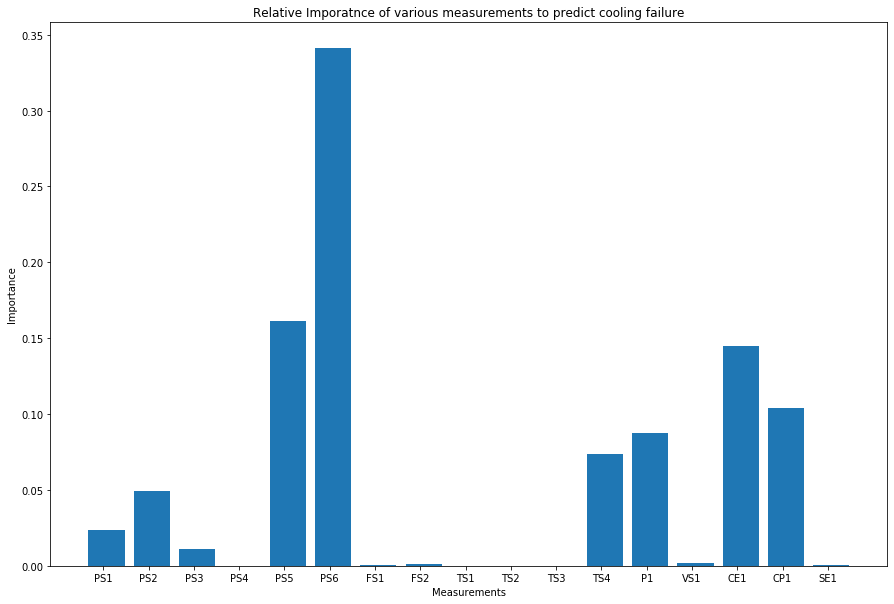

In [28]:
#let's predict the cooling failure
predict_pump_performance(X_normalize, y_coolerCondition, 'cooling failure')

Since we looking for cooling performance it make sense that the cooling efficiency and colling power are important features. Seems like pressure sensors 1 and 2 are also important, most likely due to pumping more coolant to maintain the pump at desired temperatures.

Let's predict valve condition

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

          73       0.95      0.97      0.96        39
          80       0.97      0.95      0.96        41
          90       0.84      0.84      0.84        31
         100       0.96      0.96      0.96       110

    accuracy                           0.95       221
   macro avg       0.93      0.93      0.93       221
weighted avg       0.95      0.95      0.95       221



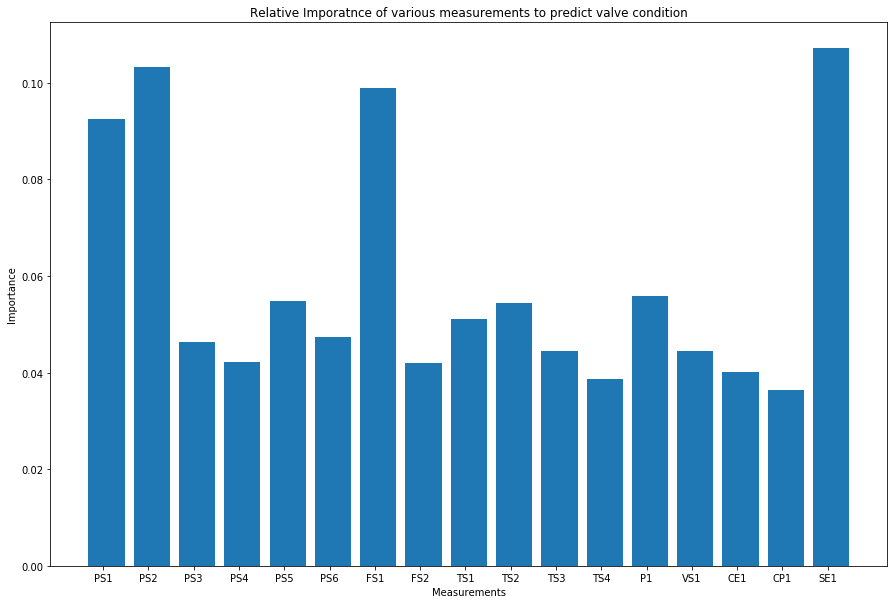

In [29]:
predict_pump_performance(X_normalize, y_valveCondition, 'valve condition')

Here volume flow is an important feature, as switching behavior of the valve might be affecting the flow of hydraulic fluid

Let's predict pump leaks

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       125
           1       0.96      0.98      0.97        54
           2       0.98      0.98      0.98        42

    accuracy                           0.99       221
   macro avg       0.98      0.98      0.98       221
weighted avg       0.99      0.99      0.99       221



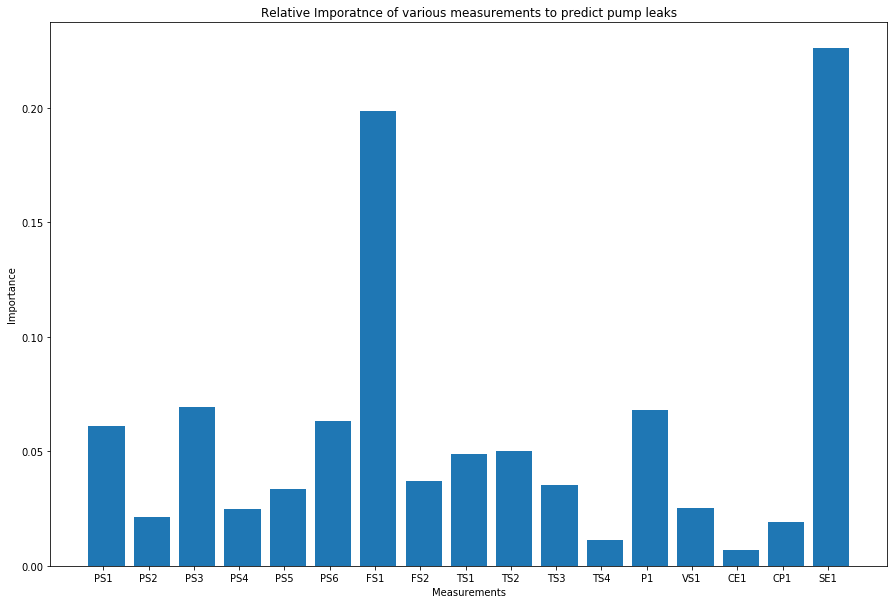

In [30]:
predict_pump_performance(X_normalize, y_pumpLeak, 'pump leaks')

Here again voulme flow is an important feature as leaking pump can have severe effect of the flow of hydraulic fluid. Addtionally, efficiency factor is important as sever leak will have an effect on the efficiency of the rig.

Let's predict hydrualic accumulator condition

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

          90       1.00      0.95      0.97        78
         100       0.92      0.95      0.94        38
         115       0.92      1.00      0.96        36
         130       1.00      1.00      1.00        69

    accuracy                           0.97       221
   macro avg       0.96      0.97      0.97       221
weighted avg       0.97      0.97      0.97       221



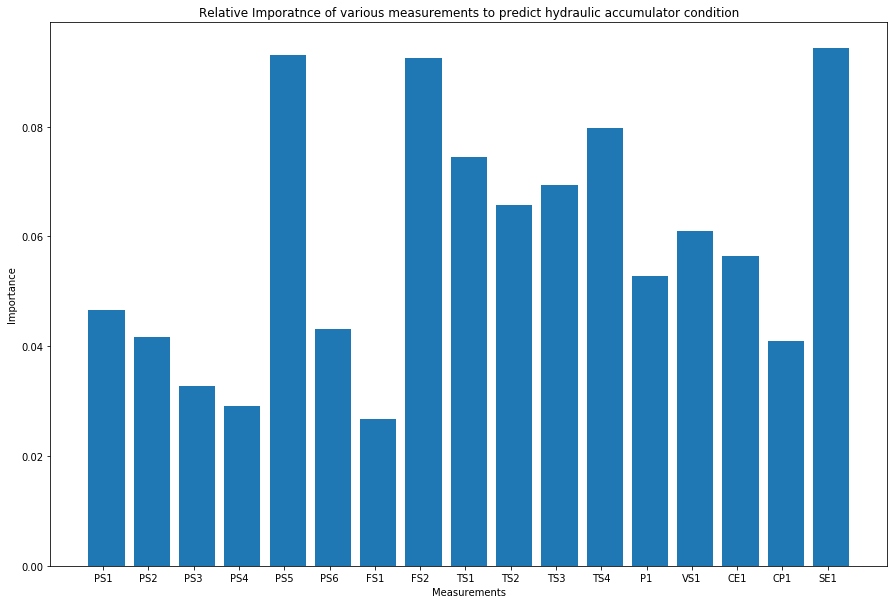

In [31]:
predict_pump_performance(X_normalize, y_hydraulicAcc,
                         'hydraulic accumulator condition')

In the case of hydraulic accumulator condition, seems like volume flow is an important feature, but rest of the features are also important.

Conclusions:

We are able to predict various pump failure conditions, with a very high level of accuracy (F1 score > 0.94 in all cases and > 0.99 in 2 cases)

## Neural Networks

In [6]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance

In [7]:
from tensorflow.keras.utils import to_categorical

label = df_profile
label = to_categorical(label[0].factorize()[0])

print('Label shape = {}'.format(label.shape))

Label shape = (2205, 3)


In [9]:
df = pd.DataFrame()
for i in data_list:
    df = df.append(i)

In [10]:
df

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,151.47,151.45,151.52,151.27,150.80,150.69,153.89,154.67,152.88,153.82,...,151.16,151.19,151.25,151.16,151.10,151.16,151.14,151.10,151.21,151.19
1,151.11,151.12,151.16,150.92,150.70,150.62,152.40,153.21,152.81,153.53,...,150.82,150.82,150.86,150.80,150.73,150.79,150.84,150.79,150.80,150.86
2,150.81,150.79,150.84,150.65,150.35,150.23,152.03,152.81,152.44,153.27,...,150.49,150.44,150.47,150.46,150.38,150.47,150.50,150.43,150.54,150.62
3,150.48,150.47,150.52,150.31,150.04,149.98,151.63,152.48,152.24,152.94,...,150.34,150.30,150.28,150.38,150.41,150.33,150.31,150.31,150.25,150.28
4,150.41,150.35,150.24,150.12,149.87,149.71,151.64,152.37,151.78,152.68,...,150.31,150.20,150.17,150.28,150.31,150.25,150.27,150.22,150.13,150.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,100.00,100.00,0.00,90.00,0.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2201,100.00,100.00,0.00,90.00,0.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2202,100.00,100.00,0.00,90.00,0.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2203,100.00,100.00,0.00,90.00,0.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.apply(normalize)
df = df.sort_index().values.reshape(-1, 4, 60).transpose(0, 2, 1)

print('DataFrame shape = {}'.format(df.shape))

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0
